# Working with time series exercises

07 February 2023


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from vega_datasets import data

# ```data.sf_temps()```

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
# getting sf_temps data

df = data.sf_temps()
df.sample(3)

,temp,date
4600,66.2,2010-07-11 17:00:00
7142,66.0,2010-10-25 15:00:00
2435,61.1,2010-04-12 12:00:00


In [3]:
# info on df

df.info() # no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
# describing stats

df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,8759.0,56.924112,6.107079,45.6,52.3,56.5,60.7,72.2


In [5]:
# resetting date to index

df = df.set_index('date')

In [6]:
# sorting to date / time

df = df.sort_index(ascending = True)
df.head(3)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9


In [7]:
# resampling by day and getting avg temp

df_day = df.resample('D').median()
df_day.head(3)

,temp
date,
2010-01-01,49.20
2010-01-02,49.30
2010-01-03,49.35


Text(0.5, 1.0, 'SF Average Daily Temperatures in 2010')

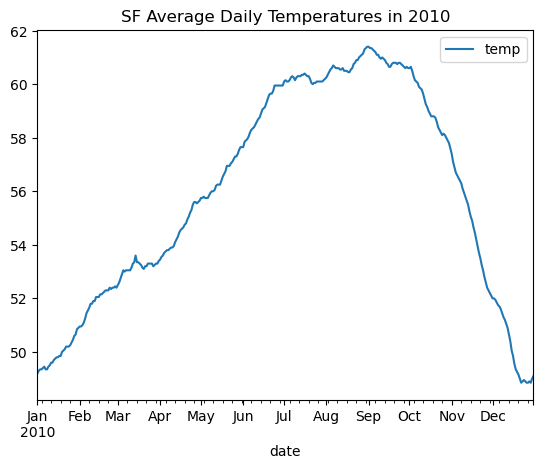

In [8]:
# ziv the avg daily temp over time

df_day.plot()

plt.title('SF Average Daily Temperatures in 2010')

### 2. Write the code necessary to visualize the minimum (daily ?) temperature over time.

In [9]:
# getting daily min temp

daily_min = df['temp'].resample('d').min()

# assigning daily min temp to df
df['daily_min'] = daily_min

Text(0.5, 1.0, 'SF Minimum Daily Temperatures in 2010')

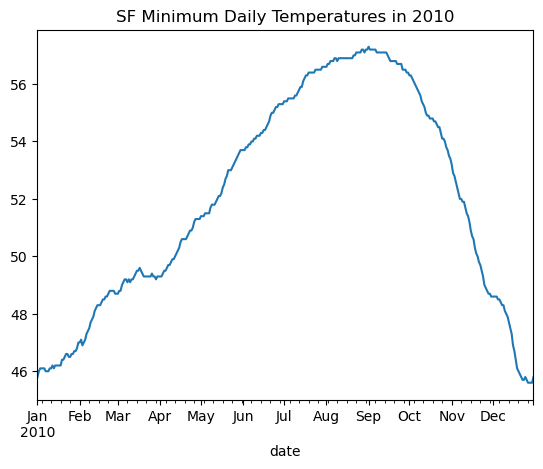

In [10]:
# plotting daily min tem

daily_min.plot()

plt.title('SF Minimum Daily Temperatures in 2010')

### 3. Write the code necessary to visualize the maximum temperature over time.

In [11]:
# getting daily max temp

daily_max = df['temp'].resample('d').max()

# assigning daily min temp to df
df['daily_max'] = daily_max

Text(0.5, 1.0, 'SF Maximum Daily Temperatures in 2010')

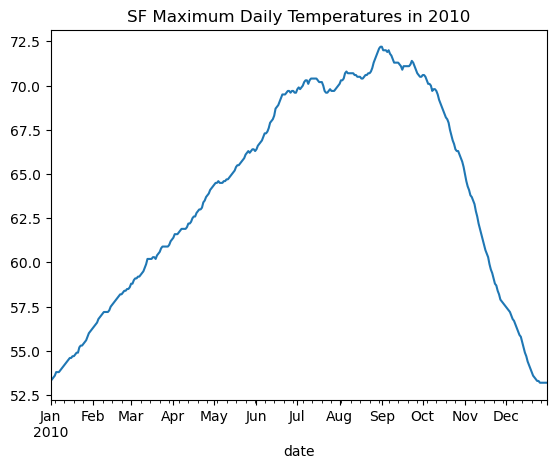

In [12]:
# plotting daily max temp

daily_max.plot()

plt.title('SF Maximum Daily Temperatures in 2010')

### 4. Which month is the coldest, on average?

In [13]:
# daterange = 1 year

df.index.max() - df.index.min()

Timedelta('364 days 23:00:00')

In [14]:
month_avg = df['temp'].resample('M').mean()

month_avg.idxmin()

# january is the coldest month on average

Timestamp('2010-01-31 00:00:00', freq='M')

In [15]:
# in-class

df['temp'].resample('m').mean().sort_values().head(1)

date
2010-01-31    49.98414
Name: temp, dtype: float64

### 5. Which month has the highest average temperature?

In [16]:
month_avg.idxmax()

# september is, on average, the warmest month

Timestamp('2010-09-30 00:00:00', freq='M')

In [17]:
# in-class

df['temp'].resample('m').mean().sort_values().tail(1)

date
2010-09-30    62.487083
Name: temp, dtype: float64

### 6. Resample by the day and calculate the min and max temp for the day. (Hint : .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day.  Which month has the highest daily temperature variability?

In [18]:
# attempting to make column with temp differences

# df['essai'] = (df['daily_min'].resample('d').sum()) - (df['daily_min'].resample('d').sum())

In [19]:
# verifying that the daily_min col is in fact the avg daily min

df['daily_min'].resample('d').sum().head(3)

date
2010-01-01    45.8
2010-01-02    46.0
2010-01-03    46.1
Freq: D, Name: daily_min, dtype: float64

In [20]:
df.head()

,temp,daily_min,daily_max
date,,,
2010-01-01 00:00:00,47.8,45.8,53.3
2010-01-01 01:00:00,47.4,NaN,NaN
2010-01-01 02:00:00,46.9,NaN,NaN
2010-01-01 03:00:00,46.5,NaN,NaN
2010-01-01 04:00:00,46.0,NaN,NaN


In [21]:
# trying aggregation

# daily_min_max_df = df.resample('D').agg(['min', 'max'])

# daily_min_max_df.head(3)

In [22]:
# min / max for each col

# daily_min_max_df.max() - daily_min_max_df.min()

In [23]:
# another attmept at subtraction
# all the rows are 0 

# (daily_min_max_df['temp'].resample('d').max() - daily_min_max_df['temp'].resample('d').min()).head(30)

In [24]:
# calculating dif btwn daily min and max

daily_dif = df['daily_max'] - df['daily_min']
df['daily_dif'] = daily_dif

In [25]:
# imputing 0 to nulls

df['daily_dif'] = df['daily_dif'].fillna(0)

In [26]:
df['daily_dif'].idxmax()

# august has the largest daily temp variability

Timestamp('2010-08-31 00:00:00')

<AxesSubplot:xlabel='date'>

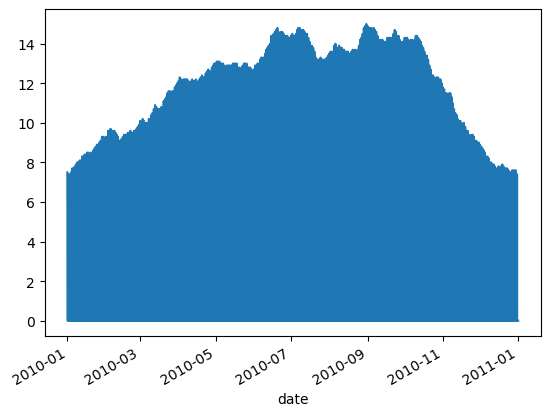

In [27]:
# plotting daily difference in temp

df['daily_dif'].plot()


### in-class example

In [28]:
daily_temps = df.temp.resample('d').agg(['min', 'max'])

In [29]:
daily_temps['temp_diff'] = daily_temps['max'] - daily_temps['min']

In [30]:
daily_temps.head(3)

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4


In [31]:
daily_temps.temp_diff.resample('m').max().sort_values(ascending = False).head(1)

date
2010-08-31    15.0
Name: temp_diff, dtype: float64

### _Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [32]:
# daily average

day_avg = df['temp'].resample('d').mean()

In [33]:
# variable to graph

d = ({'daily_max' : daily_max, 'daily_min' : daily_min, 'day_avg' : day_avg})

In [34]:
# creating temperature high-low-avg DF

temp_var = pd.DataFrame(d)
temp_var.head(2)

,daily_max,daily_min,day_avg
date,,,
2010-01-01,53.3,45.8,49.170833
2010-01-02,53.4,46.0,49.304167


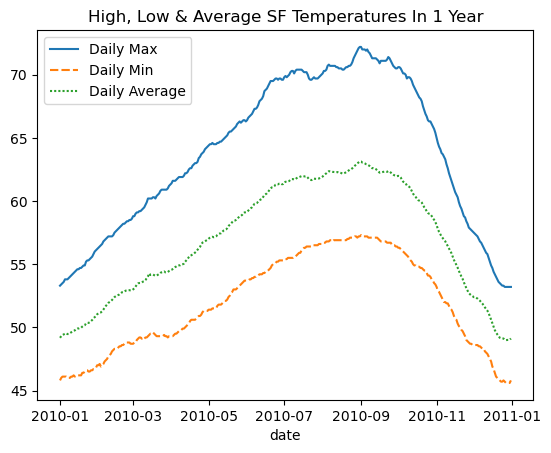

In [35]:
# plotting all three

sns.lineplot(data = temp_var)
plt.legend(labels=['Daily Max', 'Daily Min', 'Daily Average'])
plt.title('High, Low & Average SF Temperatures In 1 Year')
plt.show()

### in-class example

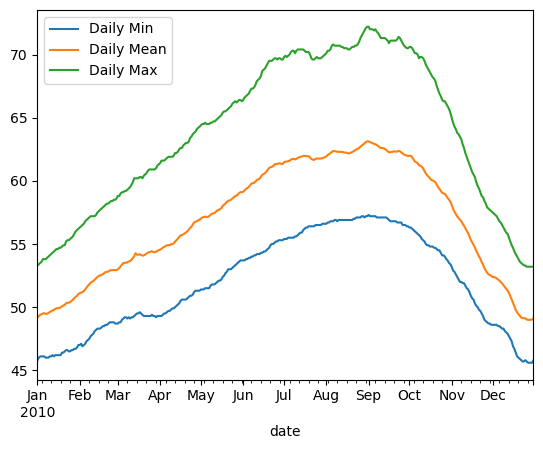

In [36]:
df['temp'].resample('d').agg(['min', 'mean', 'max']).plot()

plt.legend(labels=['Daily Min', 'Daily Mean', 'Daily Max'])

# Use the ```data.seattle_weather()``` dataset for the following exercises

In [37]:
# acquiring data 

seattle_df = data.seattle_weather()
seattle_df.head(3)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain


In [38]:
# looking at data

print(seattle_df.describe())
print()
print(seattle_df.info())
print()
print(seattle_df.shape)

       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64    

In [39]:
# setting date to index

seattle_df = seattle_df.set_index('date')

In [40]:
seattle_df.sample(3)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2013-10-24,0.0,10.0,6.1,0.6,sun
2014-09-08,0.0,21.1,13.3,2.8,sun
2012-07-31,0.0,22.8,13.9,2.8,sun


### 1. Which year and month combination has the highest amount of precipitation?

In [41]:
# one way to do it

seattle_df['precipitation'].resample('m').max().sort_index(ascending = False).nlargest(1)

date
2015-03-31    55.9
Freq: -1M, Name: precipitation, dtype: float64

In [42]:
# another way to do it

seattle_df['precipitation'].idxmax()

Timestamp('2015-03-15 00:00:00')

In [43]:
# in-class for highest month rain (as opposed to the day with the most rain, as seen above)

seattle_df['precipitation'].resample('m').sum().sort_index(ascending = False).nlargest(1)

date
2015-12-31    284.5
Freq: -1M, Name: precipitation, dtype: float64

### 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

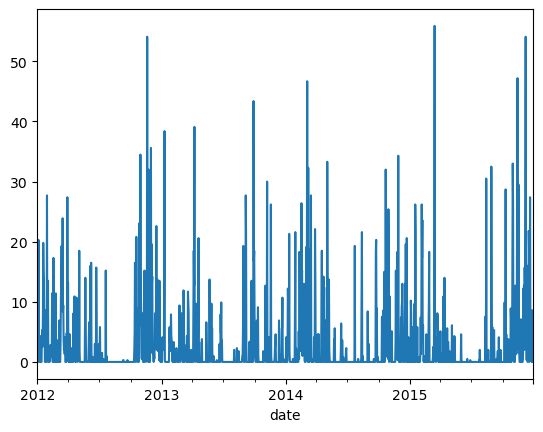

In [44]:
# plotting monthly precip

seattle_df['precipitation'].plot()

<AxesSubplot:xlabel='date'>

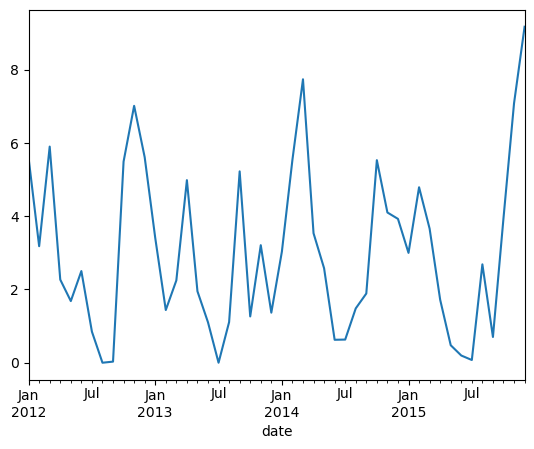

In [45]:
seattle_df['precipitation'].resample('m').mean().plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

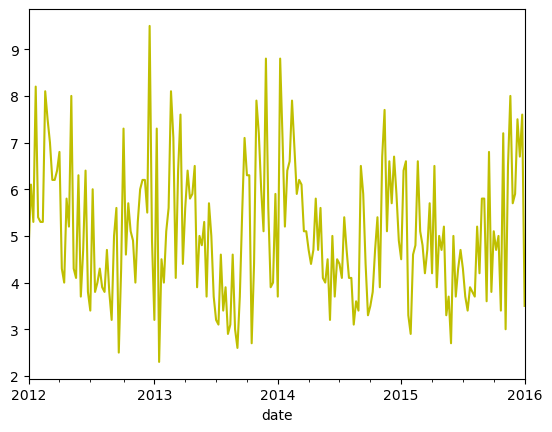

In [46]:
# plotting max weekly wind

seattle_df['wind'].resample('w').max().plot(c = 'y')


<AxesSubplot:xlabel='date'>

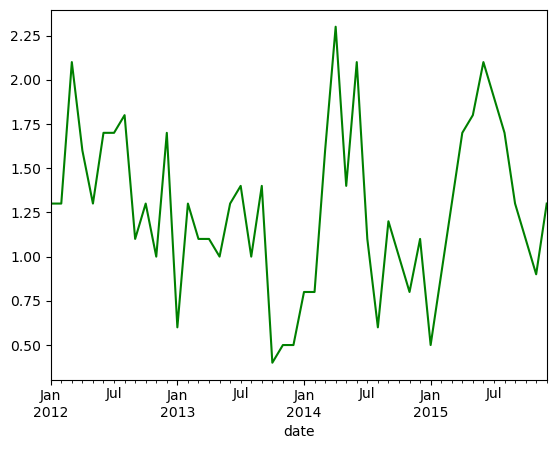

In [47]:
# plotting min monthly wind

seattle_df['wind'].resample('m').min().plot(c = 'g')

### 4. Which year-month combination is the windiest?

In [48]:
seattle_df['wind'].resample('m').max().nlargest(2)

date
2012-12-31    9.5
2013-12-31    8.8
Freq: 12M, Name: wind, dtype: float64

In [49]:
# in-lcass

seattle_df['wind'].sort_values(ascending = False).head(3)

date
2012-12-17    9.5
2014-01-11    8.8
2013-12-01    8.8
Name: wind, dtype: float64

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [50]:
# finding the sunny days

seattle_df[seattle_df['weather'] == 'sun'].resample('y').max()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,0.0,34.4,18.3,7.3,sun
2013-12-31,27.7,33.9,18.3,7.1,sun
2014-12-31,19.3,34.4,17.8,7.7,sun
2015-12-31,4.1,35.0,18.3,6.5,sun


In [51]:
# finding the sunny days another way (but, this is a month not a year)

(seattle_df['weather'] == 'sun').value_counts() 

False    747
True     714
Name: weather, dtype: int64

### 6. In which month does it rain the most?

In [52]:
# resampling to month and most precipitation

seattle_df['precipitation'].resample('m').max().nlargest(1)

date
2015-03-31    55.9
Freq: M, Name: precipitation, dtype: float64

### in-class

In [53]:
# looks at type of weather

seattle_df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [54]:
# how much of each type of weather

seattle_df['weather'].value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [55]:
# boolean col where weather == sun

seattle_df['sunny_days'] = seattle_df['weather'] == 'sun'

In [56]:
seattle_df['sunny_days'].resample('y').sum().sort_values(ascending = False)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: sunny_days, dtype: int64

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [57]:
# (seattle_df['precipitation'] == 0.0).resample('m').max().nlargest()
# precip = ['rain', 'snow']

In [58]:
# creating column if it rained T / F
# it_rained = seattle_df['weather'] == 'rain'

In [59]:
# setting column 'it_rained'

# seattle_df['it_rained'] = it_rained

In [60]:
# error message

# (seattle_df[seattle_df['it_rained'] == True]).idxmax()

In [62]:
# getting the months with days of rain max

# it_rained.resample('m').sum().idxmax()

### in-class

In [63]:
seattle_df['rainy_days'] = seattle_df['weather'] == 'rain'

In [64]:
seattle_df.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_days,rainy_days
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True


In [65]:
seattle_df['month'] = seattle_df.index.month

In [66]:
seattle_df['rainy_days'].resample('m').sum().sort_values(ascending = False).head(3)

date
2012-11-30    25
2012-12-31    23
2013-02-28    23
Name: rainy_days, dtype: int64

In [67]:
# which month has the most rain ?

seattle_df.groupby('month').rainy_days.sum().sort_values(ascending = False).head(3)

# February has the most total rainy days

month
2    40
3    37
1    35
Name: rainy_days, dtype: int64

## 7. in-class

In [68]:
# create col where it rained
seattle_df['precip_amt'] = seattle_df['precipitation'] > 0

In [69]:
seattle_df

,precipitation,temp_max,temp_min,wind,weather,sunny_days,rainy_days,month,precip_amt
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False,1,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True,1,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True,1,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True,1,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True,1,True
...,...,...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,False,False,12,True
2015-12-28,1.5,5.0,1.7,1.3,fog,False,False,12,True
2015-12-29,0.0,7.2,0.6,2.6,fog,False,False,12,False


In [70]:
# .groupby to group month with most average precipitation

seattle_df.groupby('month').precip_amt.mean().sort_values(ascending = False).head(3)

month
12    0.653226
2     0.646018
11    0.591667
Name: precip_amt, dtype: float64

# Use the ```data.flights_20k()``` dataset for the following exercises:



In [71]:
# assign variable

fly = data.flights_20k()

In [72]:
# look at df

fly.head(3)

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL


In [73]:
# resetting index to date_time

fly = fly.set_index('date').sort_index(ascending = True)

In [74]:
# df info

fly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-01 00:01:00 to 2001-03-31 21:30:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


### 1. Convert any negative delays to 0.

In [75]:
# fly[fly['delay'] < 0] = 0

fly.delay = np.where(fly.delay < 0, 0, fly.delay)

In [78]:
# df 0s replaced 

fly.head(3)

,delay,distance,origin,destination,neg_delay
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,True
2001-01-01 06:20:00,0,491,BNA,MCI,False
2001-01-01 06:30:00,0,251,MDW,STL,False


### in-class

In [84]:
fly['delay'] = np.where(fly.delay < 0, 0, fly.delay)

In [85]:
fly.head()

,delay,distance,origin,destination,neg_delay,hour
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,True,00
2001-01-01 06:20:00,0,491,BNA,MCI,False,06
2001-01-01 06:30:00,0,251,MDW,STL,False,06
2001-01-01 07:00:00,0,361,OAK,ONT,False,07
2001-01-01 07:00:00,0,303,MSY,HOU,False,07


### 2.    Which hour of the day has the highest average delay?

In [82]:
# make a col called 'hour'

fly['hour'] = fly.index.strftime('%H')

In [86]:
# groupby to find longtest hour delay

fly.groupby('hour').delay.mean().sort_values(ascending = False).head(1)

hour
03    302.5
Name: delay, dtype: float64

### 3. Does the day of the week make a difference in the delay amount?

In [88]:
fly.resample('d').delay.mean()

date
2001-01-01     8.747126
2001-01-02    21.808411
2001-01-03    17.150000
2001-01-04     7.176724
2001-01-05     9.294118
                ...    
2001-03-27     4.669683
2001-03-28     3.551282
2001-03-29    13.545455
2001-03-30     8.893162
2001-03-31     7.000000
Freq: D, Name: delay, Length: 90, dtype: float64

In [89]:
# col allowing for groupby

fly['day'] = fly.index.day_name()

In [91]:
# find day with longest avg delay

fly.groupby('day').delay.mean().sort_values(ascending = False)

day
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

### 4.    Does the month make a difference in the delay amount?


In [94]:
fly['month'] = fly.index.month_name()

In [95]:
fly.sample()

,delay,distance,origin,destination,neg_delay,hour,day,month
date,,,,,,,,
2001-02-20 17:20:00,14,321,MSY,BHM,True,17,Tuesday,February


In [99]:
fly['month'].value_counts()

March       6960
January     6784
February    6256
Name: month, dtype: int64

In [100]:
monthly_delay = fly.groupby('month').delay.mean()

In [101]:
monthly_delay

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

Text(0, 0.5, 'Delay in hours')

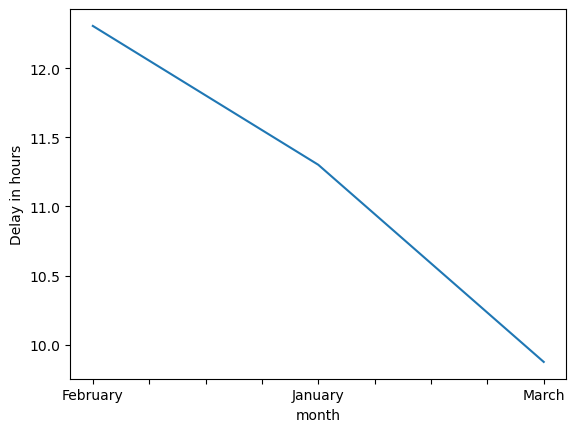

In [103]:
monthly_delay.plot()
plt.ylabel('Delay in hours')